# Basic Plotting using Matplotlib

Matplotlib is a Python 2D plotting library. Matplotlib starts with aim to provide Matlab-like plotting feature to Python. It offers rich <a href="https://matplotlib.org/tutorials/introductory/sample_plots.html">list of plotting types</a>.

## 1. Introduction and Setup

### Matplotlib Figure Hierarchy

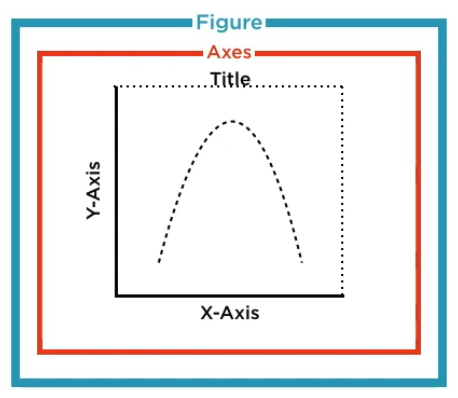

### Anatomy of Figure

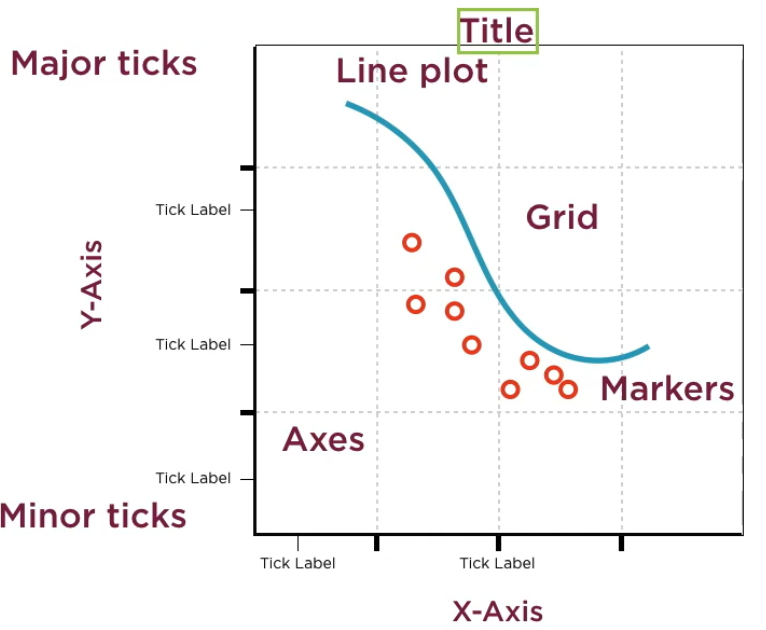

### Setup Notebook

The `%matplotlib` is a magic function to configure how Matplotlib works Jupyter Noteboiok to  present graph.

There are quite a number of options, but following 2 are most commonly used.
* `%matplotlib inline`: draw static images and store them in the notebook.
* `%matplotlib notebook`: interactive plots with zoom and resizing features embedded within the notebook

In [1]:
%matplotlib inline

Import libraries `pandas` and `matplotlib.pyplot`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Pandas Basic Plotting API

The `plot()` and `plot.xx()` in Pandas are wrapper functions which call matplotlib functions.
* They are friendlier to use.
* But only offer partial functionalities.

## Trigonometry

Initialize x and y values.

In [3]:
x = np.linspace(0,np.pi*2, 50)
y = np.sin(x)
z = np.cos(x)*2

Create a dataframe from x and y.

In [4]:
df = pd.DataFrame({'x':x, 'y':y, 'z':z})
df.head()

,x,y,z
0,0.000000,0.000000,2.000000
1,0.128228,0.127877,1.983580
2,0.256457,0.253655,1.934590
3,0.384685,0.375267,1.853834
4,0.512913,0.490718,1.742637


Plot the graph. But it plots all columns on the graph with `index` as x-axis, which is not what we want.

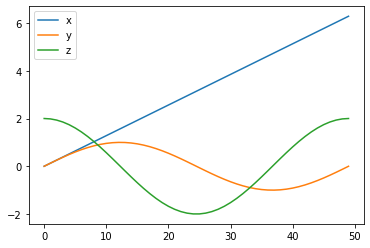

In [5]:
df.plot()

We can specify the columns for `x` and `y`. We can also set title of the graph.

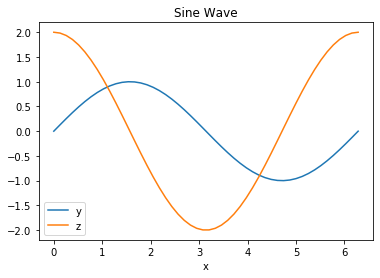

In [6]:
df.plot(x='x', title='Sine Wave')

### Environment Data (Line Graph)

These 3 CSV files are downloaded from https://data.gov.sg website.
* air-pollutant-carbon-monoxide.csv
* air-pollutant-ozone.csv
* air-pollutant-sulphur-dioxide.csv

Load the 3 csv files into respective dataframe.
* Set index column
* Rename column with long name.

In [7]:
df1 = pd.read_csv('data/air-pollutant-carbon-monoxide.csv')
df1.set_index('year', inplace=True)
df1.rename(columns={'co_max_8hour_mean':'co'}, inplace=True)
df1.head()

,co
year,
2000,3.7
2001,4.2
2002,2.7
2003,3.2
2004,2.8


In [8]:
df2 = pd.read_csv('data/air-pollutant-ozone.csv')
df2.set_index('year', inplace=True)
df2.rename(columns={'ozone_maximum_8hour_mean':'ozone'}, inplace=True)
df2.head()

,ozone
year,
2000,112
2001,133
2002,131
2003,118
2004,146


In [9]:
df3 = pd.read_csv('data/air-pollutant-sulphur-dioxide.csv')
df3.set_index('year', inplace=True)
df3.rename(columns={'sulphur_dioxide_mean':'sulphur_dioxide'}, inplace=True)
df3.head()

,sulphur_dioxide
year,
2000,22
2001,22
2002,18
2003,15
2004,14


Merge 3 dataframes together on their index, which is the year.

In [10]:
df = df1.merge(df2, left_index=True, right_index=True)
df = df.merge(df3, left_index=True, right_index=True)
df.head()

,co,ozone,sulphur_dioxide
year,,,
2000,3.7,112,22
2001,4.2,133,22
2002,2.7,131,18
2003,3.2,118,15
2004,2.8,146,14


Plot all 3 columns in the same graph.
* As 3 series are of different range, they are not suitable to share same y-axis.

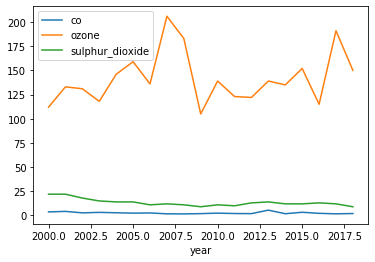

In [11]:
df.plot()

It is better to plot them on different subplots.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000264E6AC8A08>,
      dtype=object)

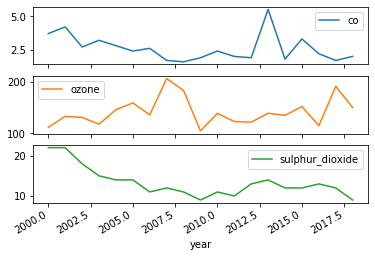

In [12]:
df.plot(subplots=True)

Fine tune to the plot with following parameters.
* Use `xticks` parameter to specify the ticks on x-axis so that it doesn't show decimal values.
* Use `rot` to rotate `xticks` by some degree so that they don't overlap each other. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000264E6CB10C8>,
      dtype=object)

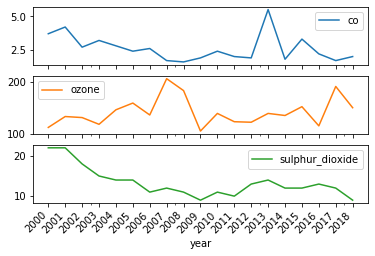

In [13]:
df.plot(subplots=True, xticks=df.index, rot=45)

### Student Marks (Bar Chart and Boxplot)

Load dataset from csv file `data/class1_test1.tsv`.

In [14]:
df1 = pd.read_csv('data/class1_test1.tsv', sep='\t')
print(df1.shape)

(9, 4)


In [15]:
df1.set_index('name', inplace=True)
df1.head()

,english,maths,science
name,,,
Aaron,70,46,47
Adrian,72,40,95
Alby,49,65,64
Abner,86,40,96
Benett,50,98,69


#### Average Marks of Students

Find the average mark of each student.
* Need to set `axis=1`

In [16]:
df1.mean(axis=1)

name
Aaron     54.333333
Adrian    69.000000
Alby      59.333333
Abner     74.000000
Benett    72.333333
Brion     89.333333
Collin    57.666667
Cyril     60.000000
Dylan     78.666667
dtype: float64

Text(0, 0.5, 'Student Name')

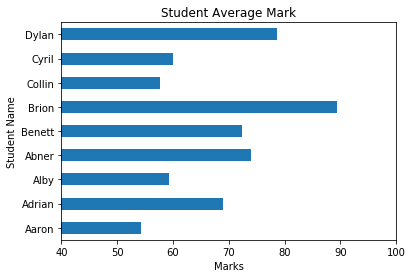

In [17]:
ax = df1.mean(axis=1).plot.barh()
ax.set_title('Student Average Mark')
ax.set_xlabel('Marks')
ax.set_xlim(40,100)
ax.set_ylabel('Student Name')

#### Average and All Subjects
Can we plot all subjects' marks together with average mark?

Add a column `Average` to dataframe.

In [18]:
df1['Average'] = df1.mean(axis=1).apply(int)
df1.head()

,english,maths,science,Average
name,,,,
Aaron,70,46,47,54
Adrian,72,40,95,69
Alby,49,65,64,59
Abner,86,40,96,74
Benett,50,98,69,72


Plot the dataframe with all columns.

Text(0, 0.5, 'Student Name')

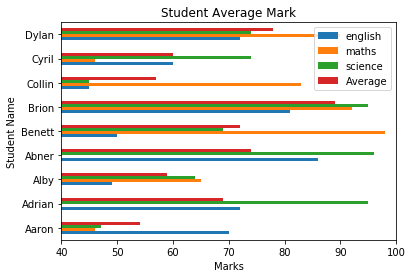

In [19]:
ax = df1.plot.barh()
ax.set_title('Student Average Mark')
ax.set_xlabel('Marks')
ax.set_xlim(40,100)
ax.set_ylabel('Student Name')

#### Concatenate Dataframes

In [20]:
df2 = pd.read_csv('data/class2_test1.tsv', sep='\t')
df2.set_index('name', inplace=True)
print(df2.shape)

(9, 3)


 Concatenate the two dataframes and set its index to `name`.

In [21]:
df = pd.concat([df1, df2])
df.drop('Average', axis=1, inplace=True)
df.head()

,english,maths,science
name,,,
Aaron,70,46,47
Adrian,72,40,95
Alby,49,65,64
Abner,86,40,96
Benett,50,98,69


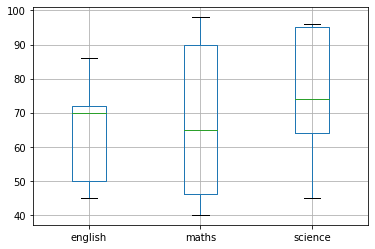

In [22]:
df.plot.box(grid=True)

### Bar Chart (Olympics Medals)

In [23]:
df = pd.read_csv('data/olympics-medals.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NOC      414 non-null    object 
 1   Country  414 non-null    object 
 2   Total    334 non-null    float64
 3   Medal    414 non-null    object 
dtypes: float64(1), object(3)
memory usage: 13.1+ KB


There are `NaN` values in the dataframe. Let's replace them with 0.

In [25]:
df.fillna(0, inplace=True)

Convert `Total` column from float to integer.

In [26]:
df['Total'] = df['Total'].astype(int)

Filter only data related to Gold medal.

In [27]:
df1 = df[ df['Medal']== 'Gold' ]

Sort them by `Total` column in descending order.

In [28]:
df1.sort_values('Total', ascending=False)

,NOC,Country,Total,Medal
0,USA,United States,2088,Gold
1,URS,Soviet Union,838,Gold
2,GBR,United Kingdom,498,Gold
6,ITA,Italy,460,Gold
4,GER,Germany,407,Gold
...,...,...,...,...
109,BER,Bermuda*,0,Gold
110,DJI,Djibouti,0,Gold
111,ERI,Eritrea,0,Gold
112,GUY,Guyana,0,Gold


Select only top 10 countries with most Gold medals.

In [29]:
df2 = df1.iloc[:10]

Plot bar graph and set axis reference to `ax`. 
* Use it to set xlabel and ylabel

Text(0, 0.5, 'Gold Medals')

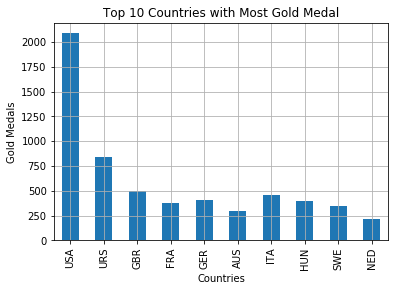

In [30]:
ax = df2.plot.bar(x='NOC', 
                  grid=True, 
                  legend=False,
                  title='Top 10 Countries with Most Gold Medal')
ax.set_xlabel('Countries')
ax.set_ylabel('Gold Medals')

### Save Figure

Charts can be saved using `savefig()` function of Figure object. 
* Get figure object from axes. 
* Tighten layout so that all labels are inside the figure.
* Save the figure

In [31]:
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('medal.png')

## 2. Matplotlib Plotting

Matplotlib provides 2 sets of APIs with same functionalities.
* Pyplot is the low-level API 
* Object-oriented API provides more flexible way of plotting using Figure and Axes.

### Trigonometry

In [32]:
x = np.linspace(0, np.pi*2, 50)
y = np.sin(x)
z = np.cos(x)*2

Create a subplot with 1 axes in the figure.
* Each line requires 2 series and 1 optional marker format.

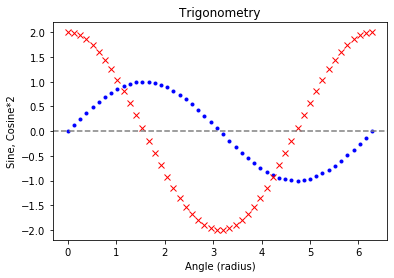

In [33]:
fig, ax = plt.subplots()
ax.set_title('Trigonometry')
ax.plot(x, y, 'b.', x, z, 'rx')
ax.set_xlabel('Angle (radius)')
ax.set_ylabel('Sine, Cosine*2')
# Add a horizontal line
ax.axhline(0, linestyle='--', color='grey')

### Environment Data

In [34]:
df1 = pd.read_csv('data/air-pollutant-carbon-monoxide.csv')
df1.set_index('year', inplace=True)
df1.rename(columns={'co_max_8hour_mean':'co'}, inplace=True)
df1.head()

,co
year,
2000,3.7
2001,4.2
2002,2.7
2003,3.2
2004,2.8


In [35]:
df2 = pd.read_csv('data/air-pollutant-ozone.csv')
df2.set_index('year', inplace=True)
df2.rename(columns={'ozone_maximum_8hour_mean':'ozone'}, inplace=True)
df2.head()

,ozone
year,
2000,112
2001,133
2002,131
2003,118
2004,146


In [36]:
df = df1.merge(df2, left_index=True, right_index=True)
df.head()

,co,ozone
year,,
2000,3.7,112
2001,4.2,133
2002,2.7,131
2003,3.2,118
2004,2.8,146


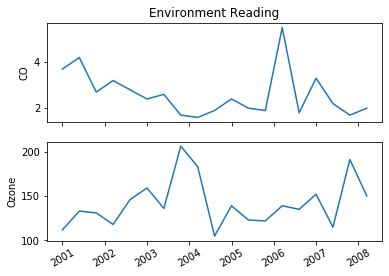

In [37]:
# Create a figure with 2 rows and 1 columns of axes
fig, ax = plt.subplots(2, 1, sharex=True)
# 1st axes
ax[0].plot(df['co'])
ax[0].set_ylabel('CO')
ax[0].set_title('Environment Reading')
# 2nd axes
ax[1].plot(df['ozone'])
ax[1].set_ylabel('Ozone')
ax[1].set_xticklabels(df.index, rotation=30);

### Olympics Medals

In [38]:
df = pd.read_csv('data/olympics-medals.csv')
df.head()

,NOC,Country,Total,Medal
0,USA,United States,2088.0,Gold
1,URS,Soviet Union,838.0,Gold
2,GBR,United Kingdom,498.0,Gold
3,FRA,France,378.0,Gold
4,GER,Germany,407.0,Gold


Use `pivot_table()` to create `Gold`, `Silver` and `Bronze` columns. 

In [39]:
df1 = df.pivot_table(index=['NOC', 'Country'], columns='Medal', values='Total')
df1.head()

,Medal,Bronze,Gold,Silver
NOC,Country,,,
AFG,Afghanistan,1.0,NaN,NaN
AHO,Netherlands Antilles*,NaN,NaN,1.0
ALG,Algeria,8.0,4.0,2.0
ANZ,Australasia,5.0,20.0,4.0
ARG,Argentina,88.0,68.0,83.0


Reset the index and set `NOC` as index.

In [40]:
df1.reset_index(inplace=True)
df1.set_index('NOC', inplace=True)

Convert data type of medal columns to integer.

In [41]:
df1.fillna(0, inplace=True)
df1 = df1[['Gold', 'Silver', 'Bronze']].astype(int)

Sort the dataframe by medals.

In [42]:
df1.sort_values(['Gold','Silver', 'Bronze'], ascending=False, inplace=True)

Get the top 10 countries.

In [43]:
df2 = df1.iloc[:10]

Plot the graph.
* Set color for each bar.
* Use `ax` to change `xlabel` and `ylabel`.

Text(0, 0.5, 'Medal Count')

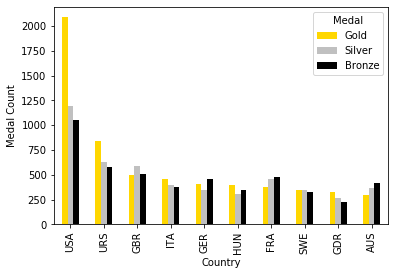

In [44]:
fig, ax = plt.subplots()
df2.plot.bar(color=['gold', 'silver', 'black'], ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Medal Count')

Change `stacked=True` to stack the bars.

Text(0, 0.5, 'Medal Count')

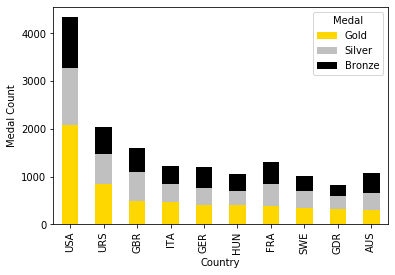

In [45]:
fig, ax = plt.subplots()
df2.plot.bar(color=['gold', 'silver', 'black'], ax=ax, stacked=True)
ax.set_xlabel('Country')
ax.set_ylabel('Medal Count')